In [1]:
# Importing Data Analysis modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For changing settings for more interaction with the shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For splitting data into train, test, to encode categorical variables, to scale the features
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# For implementing linear regression
import statsmodels.api as sm

# For metric to evaluate the models
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# setting option for pandas to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Read the dataframe
df = pd.read_csv('C:/Users/biswa/OneDrive/UPGRAD/LinearRegression/Biswa_LinearRegressionAssignment/Day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# No missing values
# instant is incremental number and can be removed.
# drop dteday.
# cnt is an aggregate, can be dropped.

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Make a copy
df1 = df.copy()

### Features

In [7]:
# Dropping features
df1.drop(['instant', 'dteday','casual', 'registered'], axis=1, inplace=True)

In [8]:
# creating categorical and continuous variable list
categorical_vars = ['season', 'weekday', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth']
continuous_vars  = ['temp', 'atemp', 'hum', 'windspeed']

In [9]:
# Changing the type of the categorical variables to category
df1[categorical_vars] = df1[categorical_vars].astype('category')

### Data Visualisation

In [10]:
# Creating dataframe visualisation
df2 = df1.copy()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


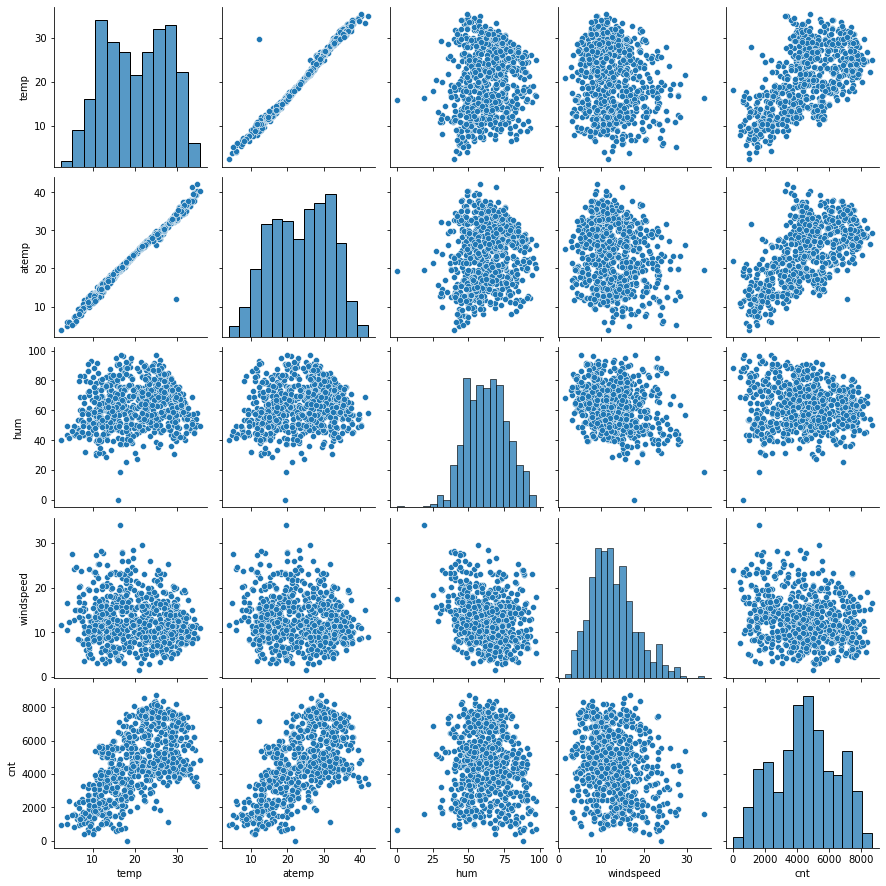

In [12]:
sns.pairplot(df2)

Variables with positive trend with target:
* atemp      -  with neither too high or too low variance. it has good linearity
* temp       -  same as temp

Variables with negative trend with target:
- windspeed  -  high variance
- hum        -  high variance

In [13]:
categorical_vars, continuous_vars

(['season', 'weekday', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth'],
 ['temp', 'atemp', 'hum', 'windspeed'])

<AxesSubplot:xlabel='season', ylabel='cnt'>

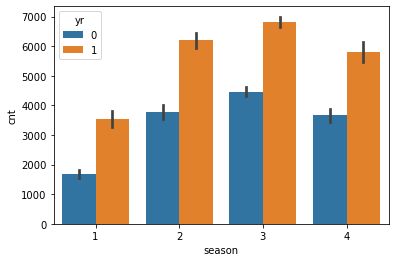

In [14]:
sns.barplot(df2['season'], df2['cnt'], df2['yr'])

Fall season has the highest bookings and Spring has the lowest

There are more bookings in the year 2019 than 2018

In [16]:
categorical_vars

['season', 'weekday', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth']

<Figure size 1080x1440 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='season', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='yr', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

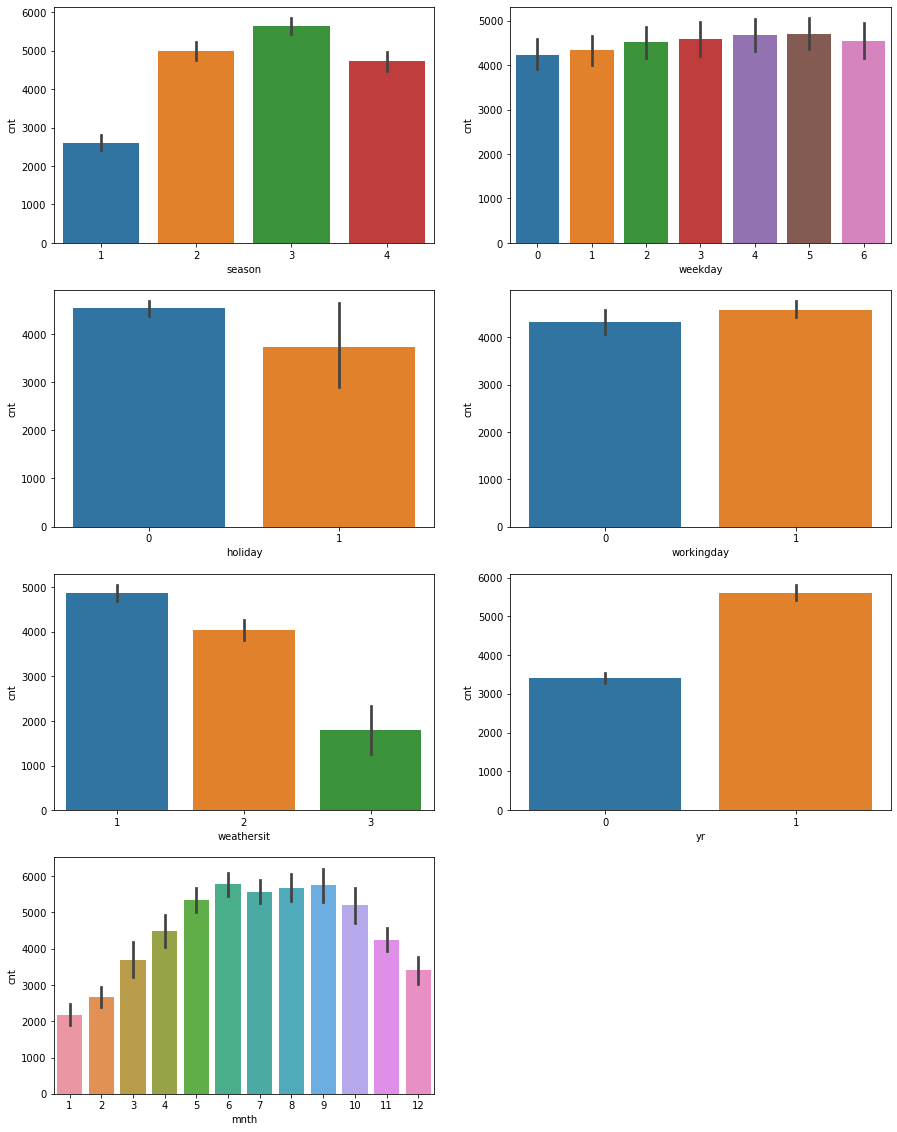

In [18]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.barplot(x = 'season', y = 'cnt', data = df2)
plt.subplot(4,2,2)
sns.barplot(x = 'weekday', y = 'cnt', data = df2)
plt.subplot(4,2,3)
sns.barplot(x = 'holiday', y = 'cnt', data = df2)
plt.subplot(4,2,4)
sns.barplot(x = 'workingday', y = 'cnt', data = df2)
plt.subplot(4,2,5)
sns.barplot(x = 'weathersit', y = 'cnt', data = df2)
plt.subplot(4,2,6)
sns.barplot(x = 'yr', y = 'cnt', data = df2)
plt.subplot(4,2,7)
sns.barplot(x = 'mnth', y = 'cnt', data = df2)

plt.show()

* The no of bookings increase month by month and then comes down
* 2019 has higher bookings
* Bookings on weekday don't have too many variance
* During Fall season, bookings were high
* Fall has more bookings

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='atemp'>

<AxesSubplot:>

<AxesSubplot:xlabel='temp'>

<AxesSubplot:>

<AxesSubplot:xlabel='windspeed'>

<AxesSubplot:>

<AxesSubplot:xlabel='hum'>

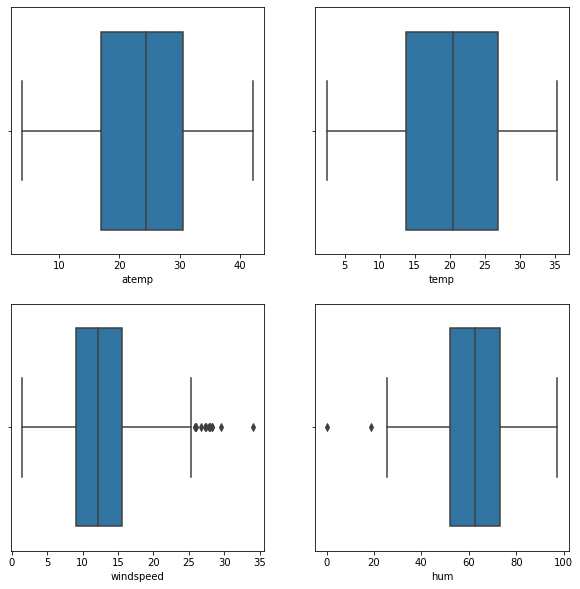

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'atemp', data = df2)
plt.subplot(2,2,2)
sns.boxplot(x = 'temp', data = df2)
plt.subplot(2,2,3)
sns.boxplot(x = 'windspeed', data = df2)
plt.subplot(2,2,4)
sns.boxplot(x = 'hum', data = df2)
plt.show()

### Encoding the categorical variables

In [20]:
for i in categorical_vars:
    df1[i].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

0    709
1     21
Name: holiday, dtype: int64

1    499
0    231
Name: workingday, dtype: int64

1    463
2    246
3     21
Name: weathersit, dtype: int64

0    365
1    365
Name: yr, dtype: int64

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

Variables to be encoded are: 
1. mnth
2. weathersit
3. season
4. weekday

In [21]:
# Fall is important as it has highest amount of bookings,
# Encoding 3 variables, weekday, weathersit, mnth
cat_encoded_df = pd.get_dummies(df1[['weekday', 'weathersit', 'mnth']], drop_first=True)

# encoding season
season_encoded_df = pd.get_dummies(df1['season'])
season_encoded_df = season_encoded_df[[2,3,4]]
season_encoded_df.columns = ['Summer', 'Fall', 'Winter']

# Concatenating the both dataframes
cat_encoded_df = pd.concat([cat_encoded_df, season_encoded_df],axis=1)

In [22]:
# As we have encoded the variables, we are going to drop the 4 variables
df1.drop(['weekday', 'weathersit', 'mnth', 'season'], axis=1, inplace=True)

In [23]:
# concatenating encoded dataframe with original dataframe
df1 = pd.concat([df1, cat_encoded_df], axis=1)

In [24]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,Summer,Fall,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [25]:
# Feature Scaling should be done after splitting data in order to avoid data breach. 
# divide the dataframe into train and test data
df_train, df_test = train_test_split(df1, test_size=0.25, random_state = 100)

In [26]:
# Scaling data for training data
scaler = MinMaxScaler()
df_train[continuous_vars] = scaler.fit_transform(df_train[continuous_vars])

df_train[continuous_vars].head()

,temp,atemp,hum,windspeed
311,0.435124,0.437339,0.743667,0.057471
523,0.735215,0.680985,0.482181,0.286093
381,0.391151,0.374375,0.737917,0.659615
413,0.358285,0.362754,0.550880,0.319514
253,0.740406,0.695906,0.735509,0.156398


### Building the model

In [28]:
from sklearn.feature_selection import RFE

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [53]:
y_train = df_train.cnt
X_train = df_train.drop('cnt', axis=1)
lr.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select= 18)
rfe.fit(X_train, y_train)

LinearRegression()

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [54]:
# Finding the dataframe with variables, support, ranking in order to eliminate the variables
pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_), columns = ['Columns', 'Support', 'Ranking'])[rfe.support_]

,Columns,Support,Ranking
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,temp,True,1
5,hum,True,1
6,windspeed,True,1
12,weekday_6,True,1
13,weathersit_2,True,1
14,weathersit_3,True,1
16,mnth_3,True,1


In [55]:
columns = X_train.columns[rfe.support_]

## Linear Model 1

In [56]:
X_train_sm = X_train[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr1 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     171.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          4.91e-207
Time:                        23:32:43   Log-Likelihood:                -4394.9
No. Observations:                 547   AIC:                             8828.
Df Residuals:                     528   BIC:                             8910.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1649.4240    239.083      6.899   

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [47]:
vif

,Features,VIF
0,const,54.13
17,Fall,6.39
4,temp,4.40
16,Summer,2.90
18,Winter,2.40
5,hum,1.97
11,mnth_5,1.87
3,workingday,1.82
13,mnth_8,1.80
7,weekday_6,1.72


In [45]:
columns = list(X_train_sm.columns)

## Linear Model 2

In [58]:

X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr2 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     171.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          4.91e-207
Time:                        23:36:23   Log-Likelihood:                -4394.9
No. Observations:                 547   AIC:                             8828.
Df Residuals:                     528   BIC:                             8910.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1649.4240    239.083      6.899   

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [60]:
vif

,Features,VIF
0,const,54.13
17,Fall,6.39
4,temp,4.40
16,Summer,2.90
18,Winter,2.40
5,hum,1.97
11,mnth_5,1.87
3,workingday,1.82
13,mnth_8,1.80
7,weekday_6,1.72


In [78]:
#Removing mnth_6 having the highest P value
columns = list(X_train_sm.columns)
columns.remove('mnth_6')


## Linear Model 3

In [79]:
X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr2 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     181.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.15e-207
Time:                        00:22:04   Log-Likelihood:                -4396.1
No. Observations:                 547   AIC:                             8828.
Df Residuals:                     529   BIC:                             8906.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1651.7964    239.381      6.900   

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,54.13
16,Fall,6.22
4,temp,3.75
15,Summer,2.84
17,Winter,2.35
5,hum,1.95
3,workingday,1.82
7,weekday_6,1.72
12,mnth_8,1.71
8,weathersit_2,1.58


## Linear Model 4

In [81]:
#Removing mnth_5 having the highest P value
columns = list(X_train_sm.columns)
columns.remove('mnth_5')

In [82]:
X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr3 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.59e-208
Time:                        00:24:10   Log-Likelihood:                -4396.8
No. Observations:                 547   AIC:                             8828.
Df Residuals:                     530   BIC:                             8901.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1619.3716    237.814      6.809   

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,53.39
15,Fall,6.06
4,temp,3.65
14,Summer,2.66
16,Winter,2.32
5,hum,1.91
3,workingday,1.82
7,weekday_6,1.72
11,mnth_8,1.71
8,weathersit_2,1.58


## Removing mnth_3 because of it's p value

## Linear Model 6

In [84]:
#Removing mnth_3 having the highest P value
columns = list(X_train_sm.columns)
columns.remove('mnth_3')

In [85]:
X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr5 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.90e-209
Time:                        00:27:09   Log-Likelihood:                -4398.9
No. Observations:                 547   AIC:                             8830.
Df Residuals:                     531   BIC:                             8899.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1677.5746    236.683      7.088   

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,52.59
14,Fall,5.82
4,temp,3.64
13,Summer,2.61
15,Winter,2.16
5,hum,1.91
3,workingday,1.81
7,weekday_6,1.72
10,mnth_8,1.71
8,weathersit_2,1.58


## Removing Fall because of it's high VIF value

## Linear Model 6

In [91]:
#Removing Fall having the highest P value
columns = list(X_train_sm.columns)
columns.remove('Fall')

In [92]:
X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr6 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.91e-209
Time:                        00:30:18   Log-Likelihood:                -4400.2
No. Observations:                 547   AIC:                             8830.
Df Residuals:                     532   BIC:                             8895.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1665.1773    236.912      7.029   

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,52.53
5,hum,1.88
3,workingday,1.81
7,weekday_6,1.72
14,Winter,1.72
4,temp,1.61
8,weathersit_2,1.58
12,mnth_10,1.52
10,mnth_8,1.46
13,Summer,1.40


## Predictions, scale the dataframe with test data and start predicting with latest linear model

In [95]:
scaler = MinMaxScaler()
df_test[continuous_vars] = scaler.fit_transform(df_test[continuous_vars])

df_test[continuous_vars].head()

,temp,atemp,hum,windspeed
184,0.837241,0.778767,0.534223,0.149393
535,0.911423,0.855132,0.470417,0.231142
299,0.496221,0.492359,0.777843,0.443398
221,0.890387,0.805661,0.236659,0.449707
152,0.821739,0.749249,0.070765,0.682387


In [96]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test = sm.add_constant(X_test)
X_test = X_test[columns]

In [97]:
y_pred = lr6.predict(X_test)
r2_score(y_test, y_pred)

0.7837332196179319

In [98]:
X_test.shape

(183, 15)

<AxesSubplot:ylabel='Density'>

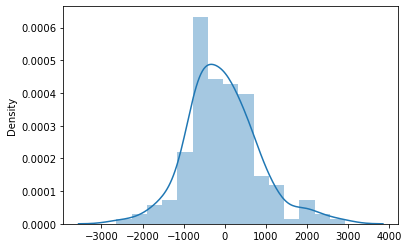

In [100]:
sns.distplot(y_pred - y_test)


<AxesSubplot:ylabel='cnt'>

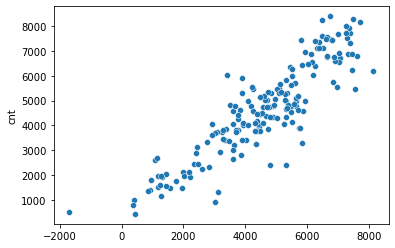

In [101]:
sns.scatterplot(y_pred, y_test)

In [102]:
lr6.params.shape

(15,)

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

([<matplotlib.axis.XTick at 0x2ac989ded90>,
 [Text(0, 0, 'weathersit_3'),
  Text(1, 0, 'windspeed'),
  Text(2, 0, 'hum'),
  Text(3, 0, 'holiday'),
  Text(4, 0, 'weathersit_2'),
  Text(5, 0, 'mnth_10'),
  Text(6, 0, 'workingday'),
  Text(7, 0, 'weekday_6'),
  Text(8, 0, 'mnth_8'),
  Text(9, 0, 'Summer'),
  Text(10, 0, 'mnth_9'),
  Text(11, 0, 'Winter'),
  Text(12, 0, 'const'),
  Text(13, 0, 'yr'),
  Text(14, 0, 'temp')])

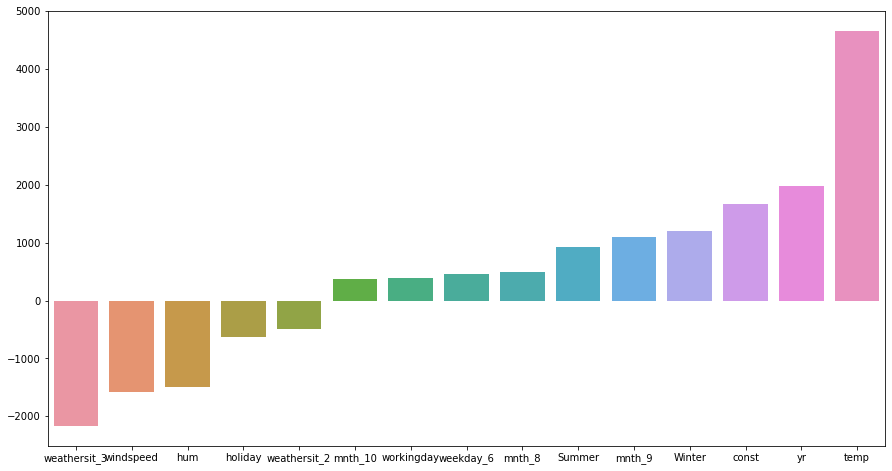

In [108]:
plt.figure(figsize = (15, 8))
sns.barplot(lr6.params.values, lr6.params.values)
ticks = np.arange(0,15,1)
plt.xticks(ticks, labels = lr6.params.sort_values().index)
plt.show()

The most effecting variables for the model are:
1. Temp
2. Year
3. Winter